In [170]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('seaborn-whitegrid')

#Prepare Data Set

df = pd.read_csv(r"sample.csv", sep =';', header = None, names = ('Date','Time','User ID','Domain'))

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df.head()

,Date,Time,User ID,Domain
0,2019-02-25,12:53:01,a37agOUtUEQiyagcdU2TAA..,youtube.com
1,2019-02-25,11:58:01,5wGdzKx3Kf4WK0gNfwZPpw..,www.google.com
2,2019-02-25,14:29:01,ZoVXA0kss3EZXHWxv96EXA..,trangtraiviet.vn
3,2019-02-25,20:52:01,SE5aS0u9gRYDV76kCwilXQ..,vn.yahoo.com
4,2019-02-25,0:58:01,EGYc8cXe6GVDH3qp-qnPSQ..,www.youtube.com


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     70000 non-null  datetime64[ns]
 1   Time     70000 non-null  object        
 2   User ID  70000 non-null  object        
 3   Domain   70000 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.1+ MB


In [ ]:
#Calculate DAU: number of unique users that engage with Coc Coc in a 24-hour window

In [137]:
DAUs = df.groupby(['Date'])['User ID'].nunique().reset_index(name = 'Daily Active Users')
DAUs['Source'] = 'All Domains'
DAUs

,Date,Daily Active Users,Source
0,2019-02-25,9734,All Domains
1,2019-02-26,9741,All Domains
2,2019-02-27,9758,All Domains
3,2019-02-28,9735,All Domains
4,2019-03-01,9712,All Domains
5,2019-03-02,9718,All Domains
6,2019-03-03,9680,All Domains


In [ ]:
#Calculate Facebook DAU: number of unique Facebook users that engage with Coc Coc in a 24-hour window

In [210]:
#Filter traffics from Facebook users

filt = df['Domain'].str.contains('facebook') | df['Domain'].str.contains('fb.com') | df['Domain'].str.contains('fb.me')

fb_users = df.loc[filt]

fb_users.head()

,Date,Time,User ID,Domain,Hour
9,2019-02-25,15:00:01,wHSJPYv6KUgm9O_0tooPjg..,www.facebook.com,15
19,2019-02-25,8:43:01,b73X_zny54-ZYkinkF7EQg..,www.facebook.com,8
20,2019-02-25,12:39:01,ydL3EpuOdF3s8Tl-2zYQxQ..,www.facebook.com,12
22,2019-02-25,18:37:01,WN6RA5CeRXYzey55m4X2WA..,www.facebook.com,18
24,2019-02-25,10:51:01,ehuy1uo1TvuTiDbYWMY3VQ..,www.facebook.com,10


In [139]:
#Calculate Facebook DAU

DAUs_fb = fb_users.groupby(['Date'])['User ID'].nunique().reset_index(name = 'Daily Active Users')

DAUs_fb['Source'] = 'Facebook'

DAUs_fb

,Date,Daily Active Users,Source
0,2019-02-25,2582,Facebook
1,2019-02-26,2515,Facebook
2,2019-02-27,2579,Facebook
3,2019-02-28,2380,Facebook
4,2019-03-01,2590,Facebook
5,2019-03-02,2659,Facebook
6,2019-03-03,2674,Facebook


In [179]:
df['Hour'] = df['Time'].str.extract('(^\d*)')

df['Hour'] = pd.to_numeric(df['Hour'], downcast = 'integer')

df.head()

,Date,Time,User ID,Domain,Hour
0,2019-02-25,12:53:01,a37agOUtUEQiyagcdU2TAA..,youtube.com,12
1,2019-02-25,11:58:01,5wGdzKx3Kf4WK0gNfwZPpw..,www.google.com,11
2,2019-02-25,14:29:01,ZoVXA0kss3EZXHWxv96EXA..,trangtraiviet.vn,14
3,2019-02-25,20:52:01,SE5aS0u9gRYDV76kCwilXQ..,vn.yahoo.com,20
4,2019-02-25,0:58:01,EGYc8cXe6GVDH3qp-qnPSQ..,www.youtube.com,0


In [ ]:
#Calculate Traffic Distribution By Hour

In [212]:
traffics_by_hour = df.groupby(['Hour'])['User ID'].count().reset_index(name = 'Traffics')
traffics_by_hour

,Hour,Traffics
0,0,1173
1,1,641
2,2,394
3,3,274
4,4,260
5,5,437
6,6,644
7,7,1642
8,8,3206
9,9,4095


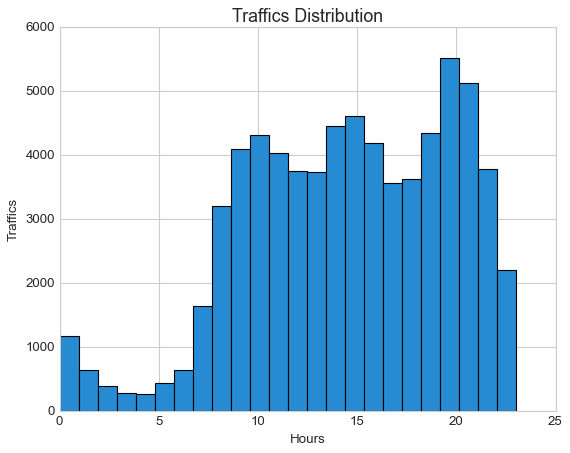

In [194]:
plt.hist(df['Hour'], bins = 24);
plt.xlabel('Hours')
plt.ylabel('Traffics')
plt.title('Traffics Distribution');

In [206]:
domains_by_traffics = df.groupby(['Domain'])['User ID'].count().sort_values(ascending = False).head(10).reset_index(name = 'Traffics')
domains_by_traffics

,Domain,Traffics
0,www.facebook.com,17403
1,www.youtube.com,13648
2,coccoc.com,6177
3,www.google.com,3657
4,mail.google.com,2250
5,www.google.com.vn,1516
6,translate.google.com,1074
7,accounts.google.com,776
8,translate.google.com.vn,773
9,www.24h.com.vn,702


In [ ]:
#Top 10 Domains By Traffic

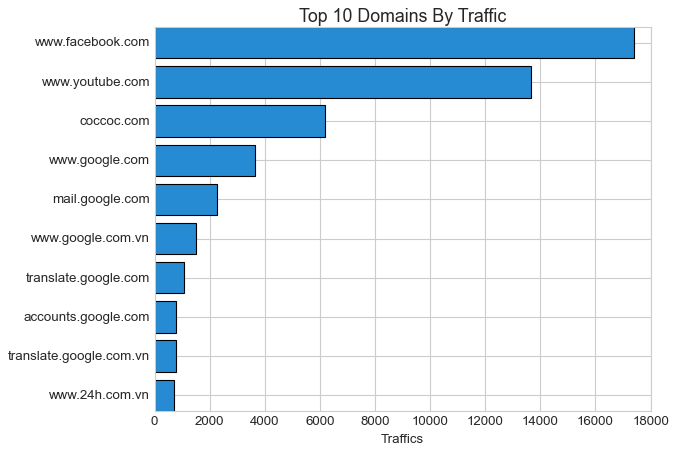

In [213]:
fig, ax = plt.subplots()
ax.barh(domains_by_traffics['Domain'],domains_by_traffics['Traffics'])
ax.set(title='Top 10 Domains By Traffic', xlabel = 'Traffics')
ax.invert_yaxis();